In [42]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2 
from keras.layers import Dense, Flatten


In [2]:
# Define the paths to your image folders
train_path = 'C:\\Users\\biraj\\OneDrive\\PythonProjects\\Machine learning neural network\\'
val_path = 'C:\\Users\\biraj\\OneDrive\\PythonProjects\\Machine learning neural network\\'
 

In [3]:

# Set the path to the folder containing the 'train' folder
data_dir = train_path


# Set the image size
img_size = (32, 32)

# Create empty lists for the images and labels
images = []
labels = []

# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(data_dir, 'train', str(label))
    # Loop over each image in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file_path.endswith(('.tiff','.bmp')):
            # Load the image and resize it to the desired size
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size)
            # Append the image and label to the lists
            images.append(img)
            labels.append(label)

# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)
 


In [56]:
# Set the path to the folder containing the 'val' folder
data_dir_val = val_path

# Set the image size
img_size_val = (32, 32)

# Create empty lists for the images and labels
images_val = []
labels_val = []

# Loop over each folder from '0' to '9'
for label in range(10): 
    folder_path = os.path.join(data_dir_val, 'val\\', str(label))
   
    # Loop over each image in the folder
    for file in os.listdir(folder_path):            
        file_path = os.path.join(folder_path, file) 
        if file_path.endswith(('.tiff','.bmp')):
            # Load the image and resize it to the desired size
            img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, img_size_val)
            # Append the image and label to the lists
            images_val.append(img)
            labels_val.append(label)

# Convert the lists to NumPy arrays
images_val = np.array(images_val)
labels_val = np.array(labels_val)

# Save the arrays in NumPy format
np.save('x_test.npy', images_val)
np.save('y_test.npy', labels_val)
 


In [82]:
# Load the dataset
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

1000
178
(1000, 32, 32)
(178, 32, 32)


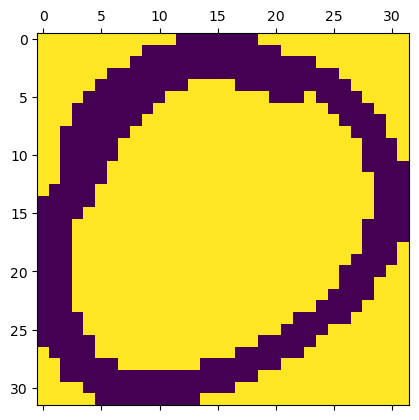

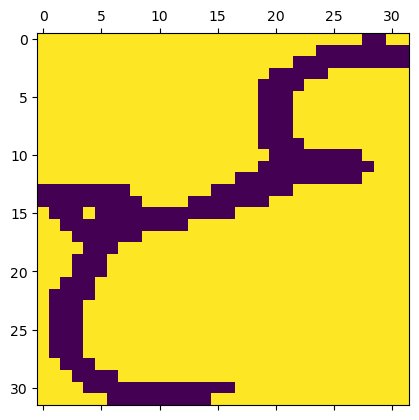

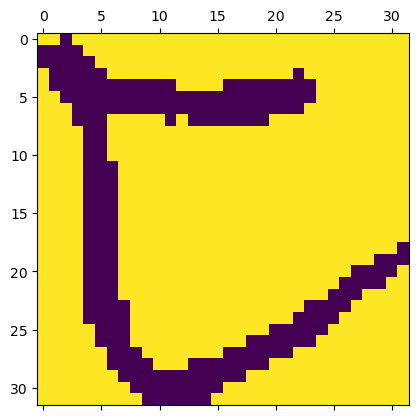

In [83]:
# test the images are loaded correctly

print(len(x_train))
print(len(x_test))
x_train[0].shape
x_train[0]
plt.matshow(x_train[0])
plt.matshow(x_train[999])
print(x_train.shape)
print(x_test.shape)
y_train
y_test
plt.matshow(x_test[150])

In [84]:
# # flatten the dataset i.e, change 2D to 1D (skipped this , and flattened in the model)

# x_train_flat = x_train.reshape(len(x_train),32*32)
# x_test_flat = x_test.reshape(len(x_test),32*32)

# print(x_train_flat.shape)
# print(x_test_flat.shape)

# x_train_flat[0]

In [85]:
# creating a simple nn
# create a dense layer where every input is connected to every other output, the number of inputs are 1000, outputs are 10
# activation function is sigmoid

model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid')    
])

# compile the nn
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
# train the model
# some 10 iterations done here
model.fit(x_train, y_train,epochs= 10, validation_data=(x_test, y_test)) 

Epoch 1/10
32/32 [==============================] - 1s 13ms/step - loss: 172.8362 - accuracy: 0.3560 - val_loss: 54.1465 - val_accuracy: 0.5899
Epoch 2/10
32/32 [==============================] - 0s 6ms/step - loss: 21.8444 - accuracy: 0.7990 - val_loss: 37.7204 - val_accuracy: 0.7303
Epoch 3/10
32/32 [==============================] - 0s 6ms/step - loss: 14.4273 - accuracy: 0.8600 - val_loss: 33.3826 - val_accuracy: 0.7640
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 8.5064 - accuracy: 0.9100 - val_loss: 21.0088 - val_accuracy: 0.8090
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 6.6391 - accuracy: 0.9110 - val_loss: 21.1726 - val_accuracy: 0.8090
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 3.2933 - accuracy: 0.9510 - val_loss: 13.3256 - val_accuracy: 0.9045
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 1.9723 - accuracy: 0.9710 - val_loss: 16.6435 - val_accuracy: 0.8371
Epoch 8/

In [86]:
# Observation : we see a better accuracy from the 2nd iteration

In [87]:
#  now scale and try to check the accuracy, divide dataset by 255 
 
x_train_scaled = x_train/255
x_test_scaled = x_test/255

model.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 1s 13ms/step - loss: 0.7792 - accuracy: 0.9040 - val_loss: 1.0426 - val_accuracy: 0.7865
Epoch 2/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7721 - accuracy: 0.8990 - val_loss: 0.9965 - val_accuracy: 0.8202
Epoch 3/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7343 - accuracy: 0.9380 - val_loss: 0.9635 - val_accuracy: 0.8596
Epoch 4/10
32/32 [==============================] - 0s 5ms/step - loss: 0.7079 - accuracy: 0.9630 - val_loss: 0.9408 - val_accuracy: 0.9045
Epoch 5/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6901 - accuracy: 0.9760 - val_loss: 0.9264 - val_accuracy: 0.9157
Epoch 6/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6772 - accuracy: 0.9860 - val_loss: 0.9150 - val_accuracy: 0.9213
Epoch 7/10
32/32 [==============================] - 0s 5ms/step - loss: 0.6671 - accuracy: 0.9860 - val_loss: 0.9070 - val_accuracy: 0.9270
Epoch 8/10
32/32 [=

In [21]:
# Observation : we got better result for all iterations on scaling the training dataset

In [88]:
# evaluate test dataset

model.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 4ms/step - loss: 0.8866 - accuracy: 0.9213


[0.8866074681282043, 0.9213483333587646]

In [23]:
# Observation : result almost same as the training dataset, 

6/6 [==============================] - 1s 14ms/step
[9.9998438e-01 5.5346927e-08 5.0402896e-06 6.5838675e-11 1.1321886e-08
 1.6560867e-07 1.6715342e-08 5.2058531e-06 5.0508324e-06 1.7350898e-08]
Predicted Value is  0
Predicted Value is  5
Predicted Value is  9


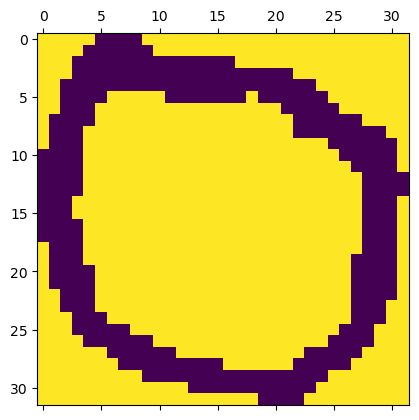

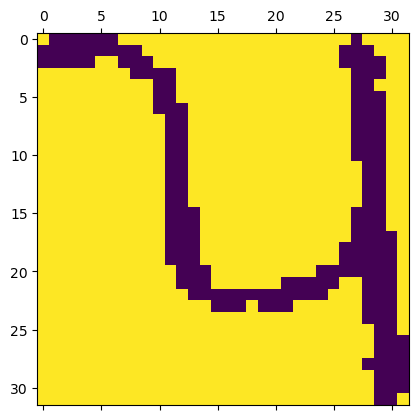

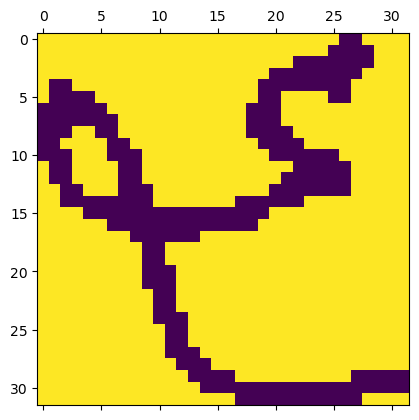

In [121]:
# predict 1st image 

plt.matshow(x_test[0])

y_predicted = model.predict(x_test_scaled)
print(y_predicted[0])

# this showing the 10 results for the input '0', we need to look for the value which is max

print('Predicted Value is ',np.argmax(y_predicted[0]))

# test some more values 

plt.matshow(x_test[88])
print('Predicted Value is ',np.argmax(y_predicted[88]))

plt.matshow(x_test[177])
print('Predicted Value is ',np.argmax(y_predicted[177]))


In [91]:
# some predictions may not be not right

# build confusion matrix to see how our prediction looks like

# convert to concrete values
y_predicted_labels=[np.argmax(i) for i in y_predicted]

print(y_predicted_labels, len(y_predicted_labels))

conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 7, 1, 1, 7, 2, 2, 7, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 4, 7, 2, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 9, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 1, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 12,  0,  0,  0,  0,  0,  4,  0,  0],
       [ 0,  0, 11,  2,  1,  1,  0,  2,  0,  0],
       [ 0,  0,  0, 16,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0, 15,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])>

Text(95.72222222222221, 0.5, 'Actual')

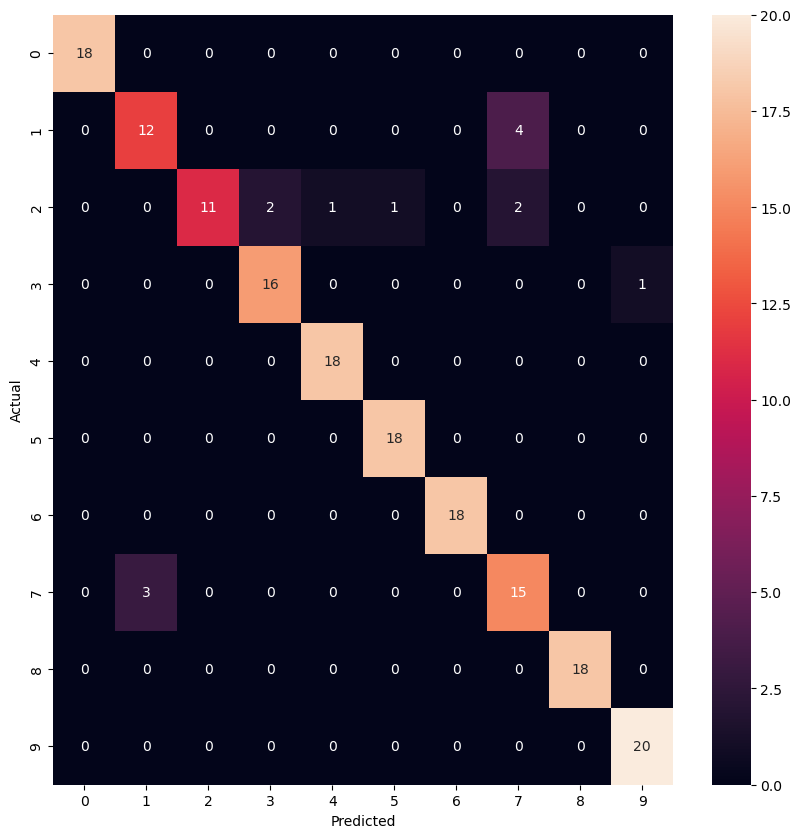

In [92]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [28]:
# here we can see there are some errors 
# we need to modify our nn, we add some layers in the above model and different activation function

In [116]:
# in 1st Dense layer,the input is 32 x 32 = 1024 neurons, which will give 10 output(numbers from 0 to 9)
# 2nd Dense layer,the input is 10 neurons from above layers output
# we can add more layers for accuracy

model2 = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(1024,input_shape=(1024,), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# compile the nn
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
# train the model
# some 10 iterations done here
history = model2.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test)) 

Epoch 1/10
32/32 [==============================] - 1s 22ms/step - loss: 1.3086 - accuracy: 0.6980 - val_loss: 0.4044 - val_accuracy: 0.8989
Epoch 2/10
32/32 [==============================] - 0s 14ms/step - loss: 0.1836 - accuracy: 0.9430 - val_loss: 0.3402 - val_accuracy: 0.9157
Epoch 3/10
32/32 [==============================] - 0s 14ms/step - loss: 0.1347 - accuracy: 0.9550 - val_loss: 0.3611 - val_accuracy: 0.8820
Epoch 4/10
32/32 [==============================] - 0s 14ms/step - loss: 0.0675 - accuracy: 0.9840 - val_loss: 0.2386 - val_accuracy: 0.9382
Epoch 5/10
32/32 [==============================] - 0s 14ms/step - loss: 0.0567 - accuracy: 0.9830 - val_loss: 0.2717 - val_accuracy: 0.9382
Epoch 6/10
32/32 [==============================] - 0s 14ms/step - loss: 0.0523 - accuracy: 0.9860 - val_loss: 0.3067 - val_accuracy: 0.9326
Epoch 7/10
32/32 [==============================] - 1s 16ms/step - loss: 0.0499 - accuracy: 0.9860 - val_loss: 0.1749 - val_accuracy: 0.9494
Epoch 8/10
32

In [117]:
# Observation : due to multiple layers the compiling will take more time to execute
# we also got amazing accuracy than earlier

# evaluate test dataset on modified model

model2.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 5ms/step - loss: 0.1806 - accuracy: 0.9607


[0.18058674037456512, 0.9606741666793823]

In [118]:
# Earlier we got  0.9213483333587646 now we got 0.9606741666793823 accuracy

# redo the confusion matrix 

# build confusion matrix to see how our prediction looks like

# convert to concrete values

y_predicted = model2.predict(x_test_scaled)
y_predicted[0]

y_predicted_labels=[np.argmax(i) for i in y_predicted]

print(y_predicted_labels, len(y_predicted_labels))

conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

6/6 [==============================] - 0s 5ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 7, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 9, 4, 2, 2, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0,  0,  2,  0,  0],
       [ 0,  0, 14,  0,  1,  1,  0,  0,  0,  1],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]])>

Text(95.72222222222221, 0.5, 'Actual')

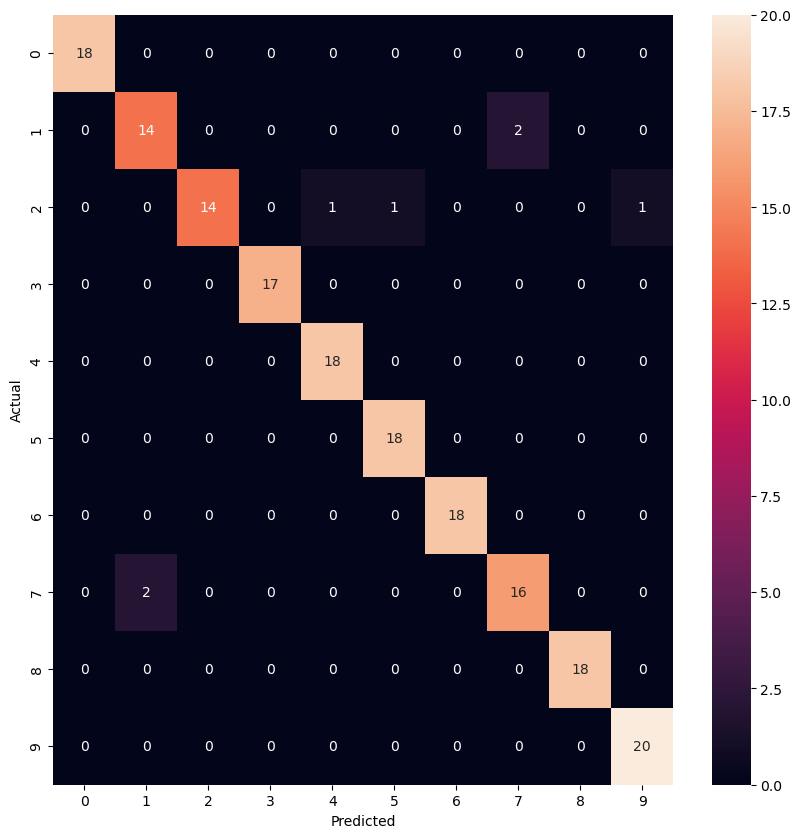

In [119]:
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [106]:
# Observatoin : we see in the updated model, there are less number of errors, 
# whatever is not in diagonal is a error

6/6 [==============================] - 0s 14ms/step - loss: 27.9263 - accuracy: 0.9719
Test accuracy: 0.9719101190567017


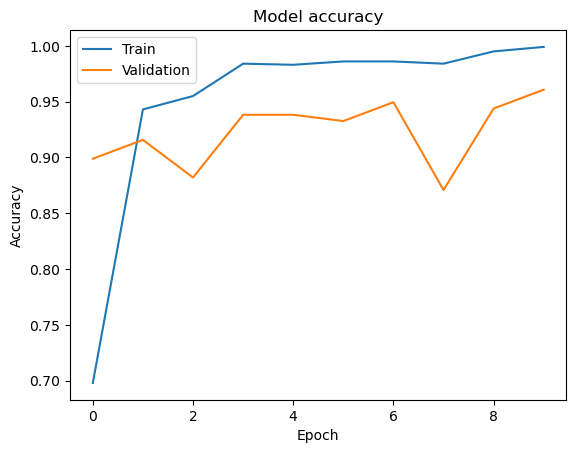

In [120]:
 
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()